# <font color = "red">Q1) Problem Statment :
### <font color = "white">Delivery_time -> Predicting delivery time using sorting time 

In [338]:
# Import required modules
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

In [339]:
# Read the csv file into data_1(dataframe)
data_1 = pd.read_csv("delivery_time.csv")
print(data_1.head())

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


## <font color = 'yellow'> Check the data in order to perform EDA steps or not ?

In [340]:
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


In [341]:
# Basic Statistics
data_1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [342]:
# Check the null values.
data_1.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [343]:
# Check the duplicate records
data_1.duplicated().sum()

0

In [344]:
# Check the correlation 
print(data_1.corr()) # Good correlation.

               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


## <font color = 'red'> Data Visualisation :


## <font color = 'Yellow'> 1) Histogram

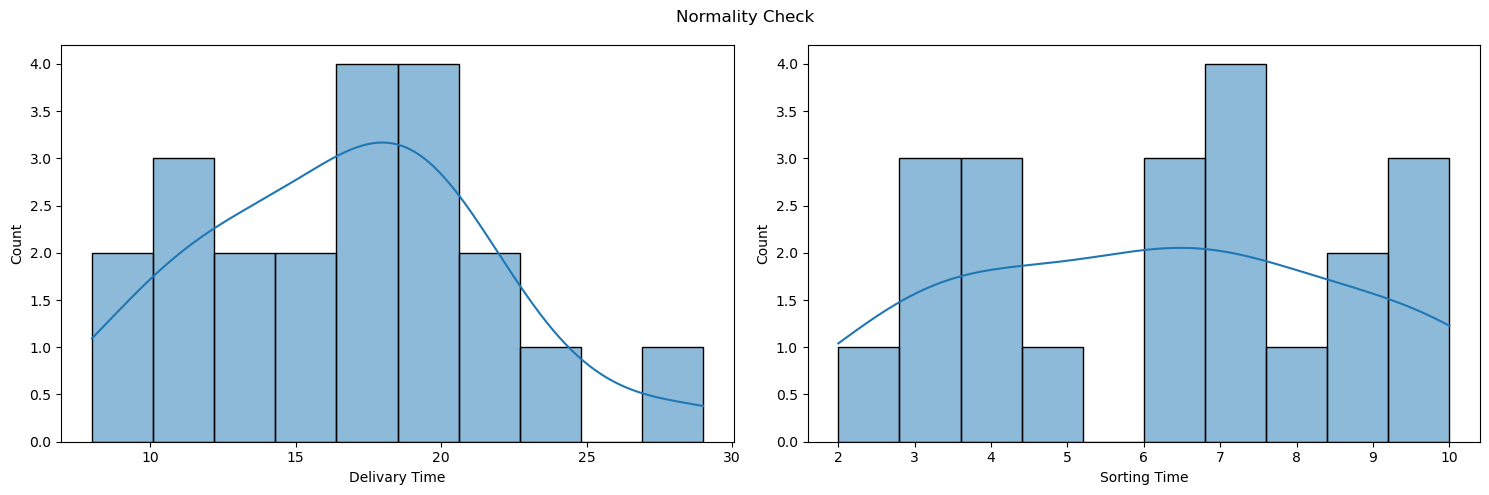

In [345]:
# Plot the histogram to check the distribution of the data.
fig, ax = plt.subplots(1,2, figsize = (15,5))
sb.histplot(data_1['Delivery Time'], bins = 10, kde = True, ax = ax[0])
sb.histplot(data_1['Sorting Time'], bins = 10, kde = True, ax = ax[1])

ax[0].set_xlabel("Delivary Time")
ax[1].set_xlabel("Sorting Time")
plt.suptitle("Normality Check")
plt.tight_layout()
plt.show()

## <font color = 'Yellow'> 2) Boxplot

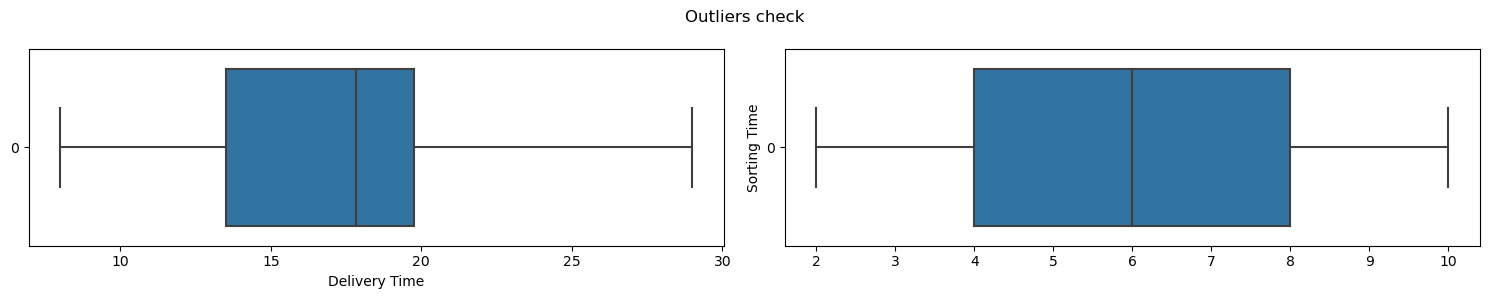

In [346]:
# Plot boxplot to check the outliers 
fig, ax = plt.subplots(1,2, figsize = (15,3))
sb.boxplot(data_1['Delivery Time'], ax = ax[0], orient = 'h')
sb.boxplot(data_1['Sorting Time'], ax = ax[1], orient = 'h')

ax[0].set_xlabel("Delivery Time")
ax[1].set_ylabel("Sorting Time")
plt.suptitle('Outliers check')
plt.tight_layout()
plt.show()

## <font color = 'Yellow'> 3) Regression plot

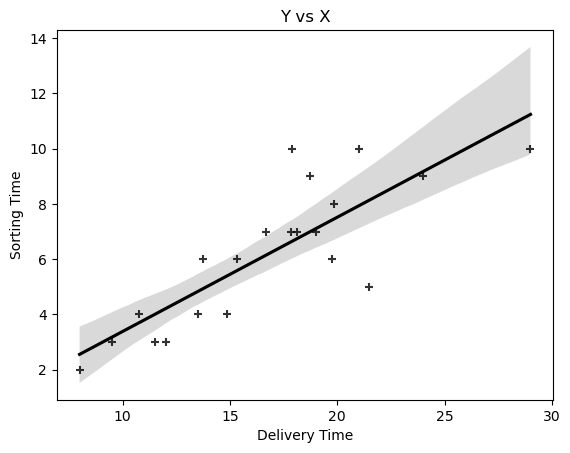

In [347]:
sb.regplot(x = 'Delivery Time', y = 'Sorting Time', data = data_1, color = 'Black', marker = '+')
plt.title('Y vs X')
plt.show()

## <font color = 'Yellow'> 4) Heatmap

<Axes: >

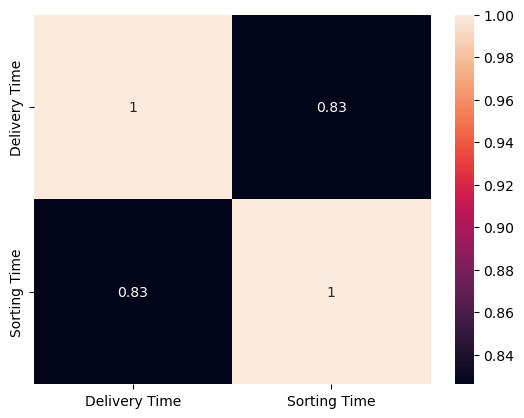

In [348]:
sb.heatmap(data_1.corr(), annot = True)

## <font color = 'red'> Model Building

In [349]:
# Read the data into separate columns
x = data_1['Sorting Time']
y = data_1['Delivery Time']

# Perform OLS method to get b0 and b1 values in order to fit the line 
model_1 = smf.ols("y ~ x", data = data_1).fit()

# Use summary() function to get our model details
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        18:53:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.0

In [350]:
# Values of b0 and b1 from model.summary()
b0 = 6.5827
b1 = 1.6490 
# Line equation
y_hat = b0 + b1*x

In [351]:
print(y_hat.head(),'\n\n')
print(y.head())

0    23.0727
1    13.1787
2    16.4767
3    21.4237
4    23.0727
Name: Sorting Time, dtype: float64 


0    21.00
1    13.50
2    19.75
3    24.00
4    29.00
Name: Delivery Time, dtype: float64


## <font color = 'Yellow'> 5) Scatter plot

Text(0, 0.5, 'Delivery Time')

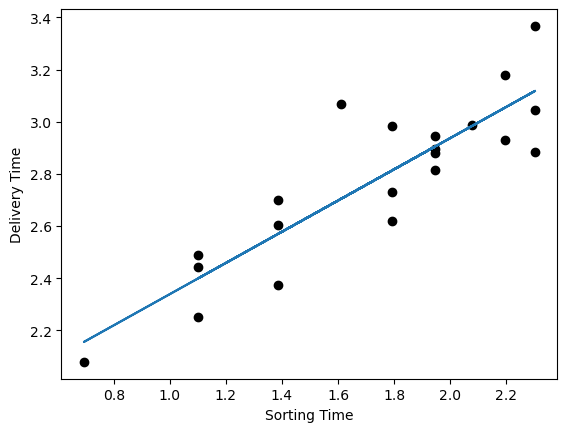

In [361]:
# Ploting line plot and scatter plot for our visulization
plt.plot(x, y_hat)
plt.scatter(x, y, c="black")

# Labeling the x and y axis
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [362]:
# New sorting time
new_sorting_time = 8 # replace with your value

# Create a new DataFrame for the new sorting time
new_data_1 = pd.DataFrame({'x': [new_sorting_time]})

# Use the model to predict the delivery time for the new sorting time
new_delivery_time = model_1.predict(new_data_1)

print(f"The predicted delivery time for a sorting time of {new_sorting_time} is {new_delivery_time[0]}")


The predicted delivery time for a sorting time of 8 is 19.774893146647017


## <font color = 'red'> Transformation of data :
## <font color = 'yellow'> Log Transformation 

In [354]:
# Tranforming the data into log data
log_Delivery_Time = np.log(data_1['Delivery Time'])
log_Sorting_Time = np.log(data_1['Sorting Time'])

up_data = pd.DataFrame({'x' : log_Sorting_Time,
                       'y' : log_Delivery_Time})

In [355]:
up_data.head()

,x,y
0,2.302585,3.044522
1,1.386294,2.602690
2,1.791759,2.983153
3,2.197225,3.178054
4,2.302585,3.367296


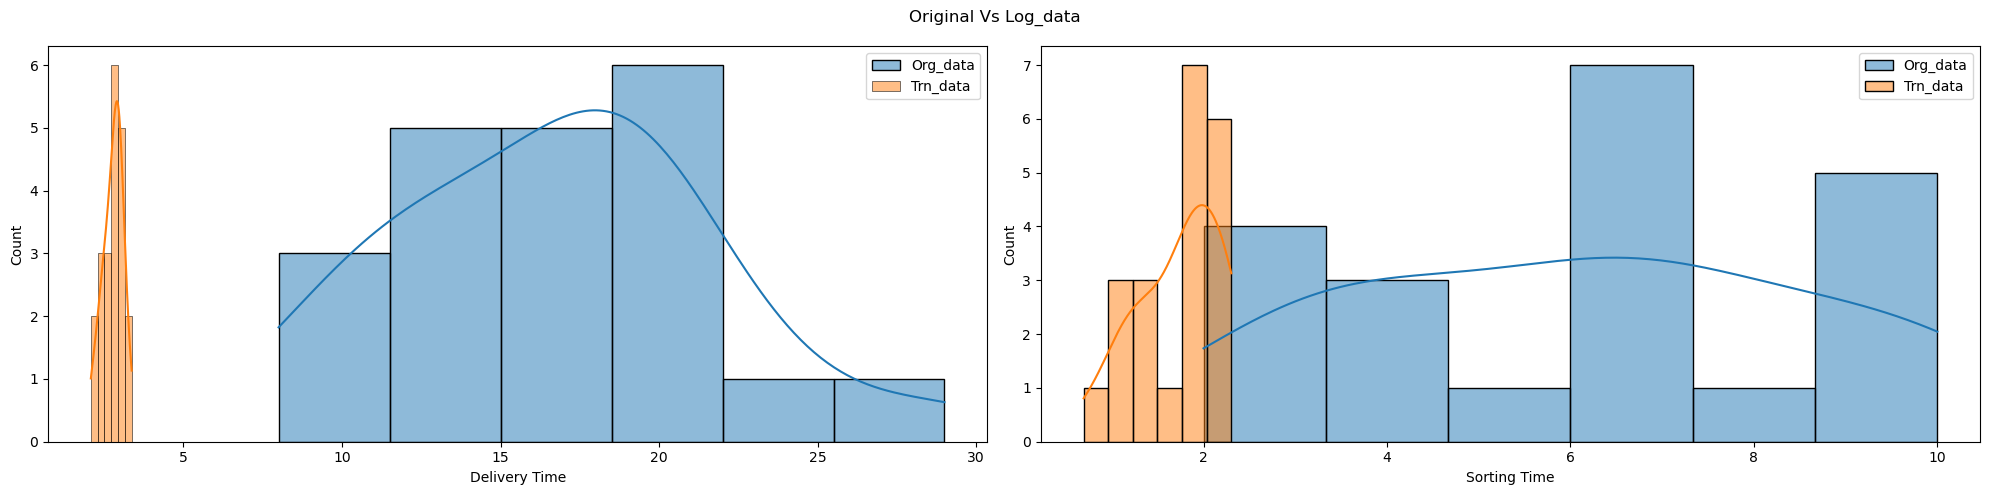

In [356]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Comparing Delivery Time
sb.histplot(data_1['Delivery Time'], kde=True, ax=ax[0], label='Org_data')
sb.histplot(log_Delivery_Time, kde=True, ax=ax[0], label='Trn_data')

# Comparing Sorting Time
sb.histplot(data_1['Sorting Time'], kde=True, ax=ax[1], label='Org_data')
sb.histplot(log_Sorting_Time, kde=True, ax=ax[1], label='Trn_data')

# Add legends to both plots
ax[0].legend()
ax[1].legend()

plt.suptitle("Original Vs Log_data")
plt.tight_layout()
plt.show()


In [357]:
# Read the data into separate columns
x = up_data['x']
y = up_data['y']

# Perform OLS method to get b0 and b1 values in order to fit the line 
updated_model = smf.ols("y ~ x", data = up_data).fit()

# Use summary() function to get our model details
print(updated_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 06 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                        18:53:41   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.0

In [358]:
# Values of b0 and b1 from model.summary()
b0 = 1.7420
b1 = 0.5975 
# Line equation
#x = sm.add_constant(x)
y_hat = b0 + b1*x

Text(0, 0.5, 'Delivery Time')

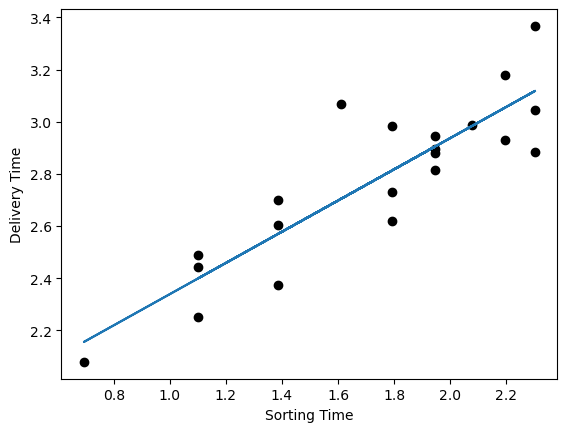

In [359]:
# Ploting line plot and scatter plot for our visulization
plt.plot(x, y_hat)
plt.scatter(x, y, c="black")

# Labeling the x and y axis
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

In [360]:
table = pd.DataFrame({'model' : [model_1.rsquared],
                     'updated_model' : [updated_model.rsquared]})

table

,model,updated_model
0,0.682271,0.772161


# First model had 68% accuracy, whereas our second updated model has 77% of accuracy in predicting. ***Hence consider updated model***